<a href="https://colab.research.google.com/github/JorgeSedek/tp1_orga_datos/blob/main/V4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

V4) Reproduzca exactamente esta visualización(es el heapMap)

In [ ]:
df_peliculas = pd.read_csv('/content/drive/MyDrive/orgaDatos/Movie dataset/movies.csv')

Text(144.15277777777789, 0.5, 'Género')

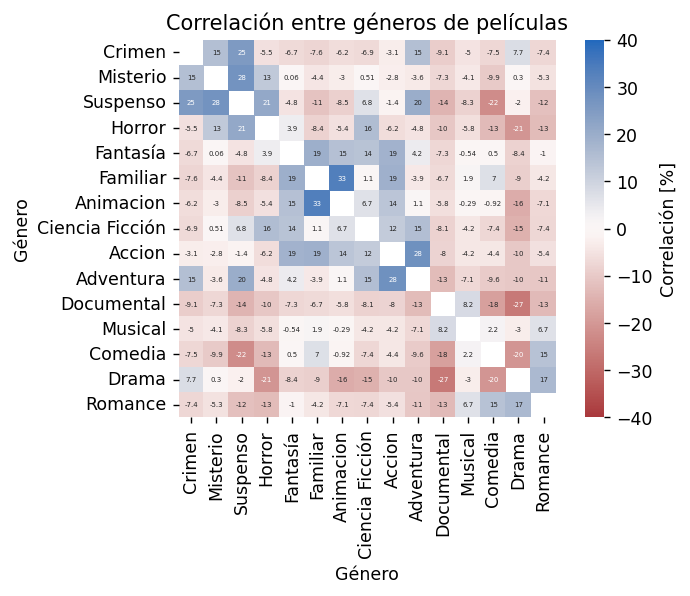

In [ ]:
df_peliculas["generos"] = df_peliculas["genres"].dropna().astype("string").map(lambda x: [ y.strip().lower() for y in x.split(",")])
expandido = df_peliculas.explode("generos")
expandido = expandido.reset_index()
expandido["aparicion"] = 1
df_count = expandido.pivot_table(index="index",columns="generos",values="aparicion",aggfunc="count").fillna(0)
df_count.columns = ["Adventura","Accion","Animacion","Comedia","Crimen","Documental","Drama",
    "Familiar","Fantasía","Extrangera","Historia","Horror","Musical","Misterio","Romance","Ciencia Ficción"
                            ,"Suspenso","Pelicula Television","Guerra","Western"]

df_generos = df_count[['Crimen','Misterio','Suspenso','Horror','Fantasía','Familiar','Animacion',
                      'Ciencia Ficción','Accion','Adventura','Documental','Musical','Comedia',
                      'Drama','Romance']]
matriz = df_generos.corr().transform(lambda x: x*100)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np; np.random.seed(0)

plt.figure(dpi=125)
plt.title("Correlación entre géneros de películas")
sns.heatmap(matriz, square=True, 
            cmap=sns.color_palette("vlag_r", as_cmap=True),mask = np.eye(15),  yticklabels = df_generos.columns, vmin=-40, vmax=40,annot=True, annot_kws={"size": 4}, cbar_kws={'label': 'Correlación [%]'})
plt.xlabel("Género")
plt.ylabel("Género")